In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import log_loss


In [5]:
#Loading dataset and making this ready for pre processing

new_col=['pregnancy','glucose','bp','skin','insulin','bmi','diabetes','age','label']
pima= pd.read_csv(r"C:\Users\dtdee\OneDrive\Desktop\Letsupgrade_Python\Machine_Learning\Logistic_Regresssion\1679205403358_pima-indians-diabetes.csv",skiprows=1,names=new_col)

In [6]:
pima

,pregnancy,glucose,bp,skin,insulin,bmi,diabetes,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [7]:
pima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pregnancy  768 non-null    int64  
 1   glucose    768 non-null    int64  
 2   bp         768 non-null    int64  
 3   skin       768 non-null    int64  
 4   insulin    768 non-null    int64  
 5   bmi        768 non-null    float64
 6   diabetes   768 non-null    float64
 7   age        768 non-null    int64  
 8   label      768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [12]:
pima['glucose']

0      148
1       85
2      183
3       89
4      137
      ... 
763    101
764    122
765    121
766    126
767     93
Name: glucose, Length: 768, dtype: int64

In [8]:
#Splitting the data into target and features
data=['pregnancy','glucose','bp','skin','insulin','bmi','diabetes','age']
X=pima[data]
Y=pima['label']

In [9]:
#splitting the data into Training and testing dataset and there is taylormade funtion in sklearn to split the data

from sklearn.model_selection import train_test_split

In [76]:
X_train,x_test,Y_train,y_test= train_test_split(X,Y,test_size=0.25)

In [78]:
#Model Building and training using fit method

from sklearn.linear_model import LogisticRegression

In [116]:
log=LogisticRegression(random_state=16,max_iter=500)

In [117]:
log.fit(X_train,Y_train)

LogisticRegression(max_iter=500, random_state=16)

In [118]:
y_pred= log.predict(x_test)

In [119]:
print(x_test[0:5])
print()
print(y_pred[0:5])
print()
print(y_test)

     pregnancy  glucose   bp  skin  insulin   bmi  diabetes  age
731          8      120   86     0        0  28.4     0.259   22
377          1       87   60    37       75  37.2     0.509   22
688          1      140   74    26      180  24.1     0.828   23
672         10       68  106    23       49  35.5     0.285   47
95           6      144   72    27      228  33.9     0.255   40

[0 0 0 0 1]

731    1
377    0
688    0
672    0
95     0
      ..
509    0
128    1
491    0
597    0
406    1
Name: label, Length: 192, dtype: int64


###### Model performance evaluation

In [132]:
from sklearn import metrics

In [133]:
# to check the acuuracy of the output of the model

acc= metrics.accuracy_score(y_pred,y_test)
acc

0.734375

In [134]:
conf_mat= metrics.confusion_matrix(y_pred,y_test)

In [135]:
conf_mat

array([[105,  39],
       [ 12,  36]], dtype=int64)

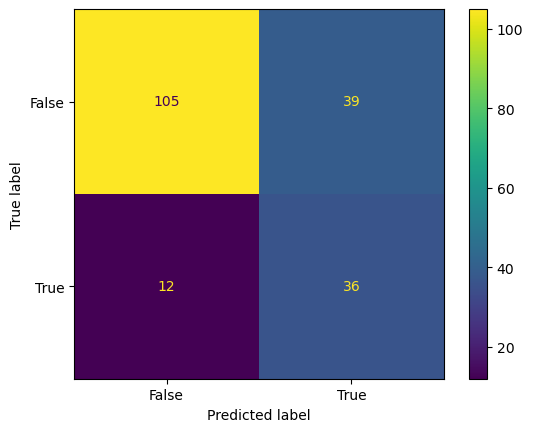

In [142]:
#Displaying confusion matrix to check the performance of the model

con_mat_display=metrics.ConfusionMatrixDisplay(confusion_matrix=conf_mat,display_labels=[False,True])
con_mat_display.plot()
plt.show()

In [143]:
#To check the preformance measurement of the score and the model

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.73      0.90      0.80       117
           1       0.75      0.48      0.59        75

    accuracy                           0.73       192
   macro avg       0.74      0.69      0.69       192
weighted avg       0.74      0.73      0.72       192

